## Knee Image Classification for Diagnostic

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
#from tensorflow import keras
import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.14.0
Keras Version: 2.14.0


### Exploring the Data

In [2]:
# Load training and testing data from the xray_data dataset using Pandas
xray_data = pd.read_csv('XRay_Dataset/xray_knees.csv')
xray_data.info()
print(xray_data.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dcm     50 non-null     object
 1   jpg     50 non-null     object
 2   type    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
              dcm             jpg        type
0  /stage_1/0.dcm  /stage_1/0.jpg  1-st stage
1  /stage_1/1.dcm  /stage_1/1.jpg  1-st stage
2  /stage_1/2.dcm  /stage_1/2.jpg  1-st stage
3  /stage_1/3.dcm  /stage_1/3.jpg  1-st stage


In [6]:
xray_data.describe()

,dcm,jpg,type
count,50,50,50
unique,50,50,6
top,/stage_1/0.dcm,/stage_1/0.jpg,2-nd stage
freq,1,1,10


### Uploading the Images from the Directory

In [43]:
import pathlib

data_dir = pathlib.Path('XRay_Dataset/files')

batch_size = 50
img_height = 224
img_width = 224

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    seed = 42,
    validation_split = None)


Found 50 files belonging to 6 classes.


### Displaying the Images

50


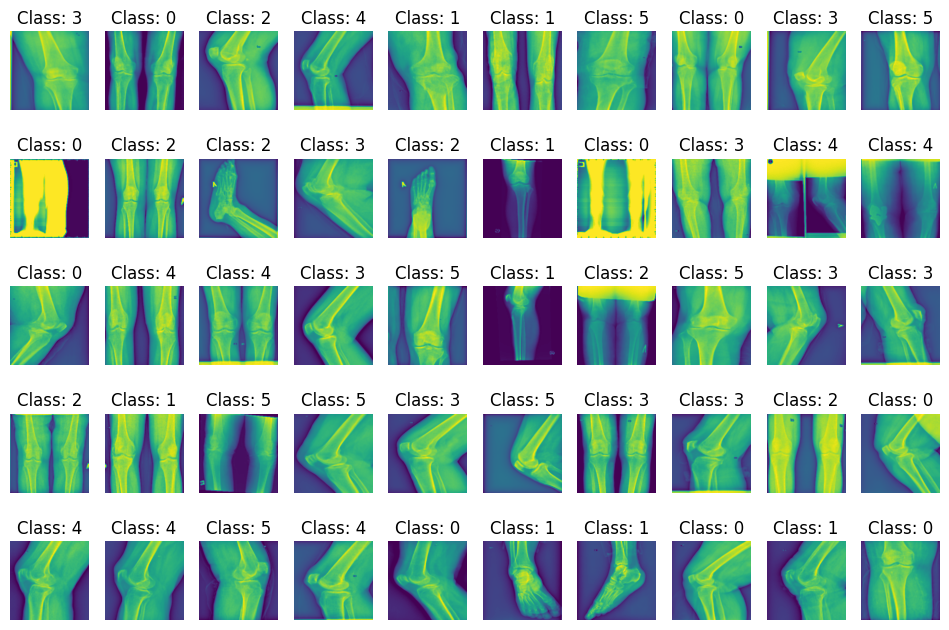

In [46]:
# Display the images

data_iterator = data.as_numpy_iterator()
images, labels = data_iterator.next()
print(len(images))
plt.figure(figsize = (12, 8))
for i in range(len(images)):
    plt.subplot(5, 10, i + 1)
#    plt.imshow(images[i])
# Gaussian filter reduces high-frequency components.
    blurred_image = cv2.GaussianBlur(images[i], (5, 5), 0)
    plt.imshow(blurred_image)
    plt.title(f'Class: {np.argmax(labels[i])}') 
    plt.axis('off')

plt.show()

### Checking is the Dataset is Balanced

[6. 6. 4. 5. 5. 6.]
6


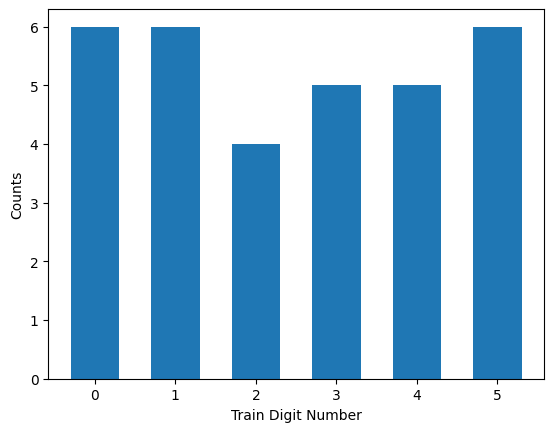

In [34]:
row_sums = np.sum(labels, axis = 0)
print (row_sums)
print(row_sums.shape[0])
      
plt.bar(list(range(row_sums.shape[0])),row_sums,width = 0.6)
plt.xlabel('Train Digit Number')
plt.ylabel('Counts')
plt.show()

### Data Augmentation

In [37]:
# Data augmentation layers
data_augmentation = tf.keras.Sequential([
tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
tf.keras.layers.RandomRotation(factor=0.05, seed=42),
tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])